# Introduction to the Stochastic Gradient Descent Algorithm in Python

## Introduction

Imagine you are trying to find the lowest point among the hills while blindfolded. Since you are limited by your touch, you can only feel the ground immediately around you to determine which way is down. This is essentially what machine learning algorithms do when they are trying to find the best solution to a problem. They frame the problem into a mathematical function whose inputs and outputs represent a hilly surface. Finding the minimum of this function means you've reached the best solution to the problem. One of the most popular algorithms for doing this process is called Stochastic Gradient Descend (SGD).

In this tutorial, you will learn everything you should know about the algorithm including:

- Initial intuition without the math
- The mathematical details
- Implementation in Python

Let's get started!

## What Is Optimization in Machine Learning?

The first thing we need to clear straight away is that stochastic gradient descent (SGD) is not a machine learning algorithm. Rather, it is merely an optimization technique that can be applied _to_ ML algorithms. 

So, what is optimization? To understand this, let's work our way up from the problem statement stage of machine learning. 

Let's say we are trying to predict diamond prices based on their carat value (a carat is 0.2 grams). This is a regression problem as the model produces numeric values. 

To solve the problem, we have a wide range of algorithms at our disposal but let's choose Simple Linear Regression, which has the simple formula of `f(x) = mx + b`. Here:
- `b` is the base diamond price
- `m` is the price increase per carat
- `x` is the carat value of the diamond
- `f(x)` is the predicted price of the diamond

This linear equation represents our model. Our goal is to find the best values for `m` and `b` that will make our predictions as accurate as possible across all the diamonds in our dataset. 

If we had another variable in the picture like diamond volume, our formula would change to `f(x1, x2) = m1*x1 + m2*x2 + b`, where:
- `b` is the base diamond price
- `m1` is the price increase per carat
- `m2` is the price increase per unit volume
- `x1` is the carat value of the diamond
- `x2` is the volume of the diamond
- `f(x)` is the predicted price of the diamond

Now, we would need to find the optimal values for `m1, m2`, and `b`. 

In general, all machine learning models have equations like the ones above with one or more parameters. Thus, the definition of optimization in this context becomes: "Given this model and this dataset, find the optimal values for the parameters in the equation."

There are many optimization algorithms that can perform this task, like Stochastic Gradient Descent - the focus of our tutorial. But we fully understand how SGD works, let's go over some fundamental ideas behind it.

## II. The Concept of Error in Machine Learning

To understand SGD, we need to learn regular gradient descent algorithm, which shares a lot of the fundamental ideas behind its stochastic version. Simple gradient descent starts with the concept of error in machine learning.

### What is an error or loss?
ML algorithms usually guess what the correct answer is to a problem. We call this answer a __prediction__ and it is not always accurate. So, we introduce a new term called "error" or "loss" that represent the difference between the actual answer and the model's prediction. Our goal is to build a model that minimizes this error. 

Let's make this concrete by going back to the diamond prices prediction example. 

If our model `f(x)` guesses $10,000 for a diamond that actually costs $12,000, the error is $2000. We should adjust our model to decrease this error.

But the model's predictions must be good for any diamond, not just a single one. So, we need a way to combine the error for all diamonds in our dataset. This is where cost functions come in.

A cost function combines all individual errors into one number that represents the overall performance of our model. Lower cost means our model's predictions are better. 

### Cost functions in machine learning

Cost functions change based on what kind of problem we are solving. 

In regression problems, the model predicts numeric values like how much a diamond costs or how much time it takes to swim a lap. 

In classification, the model predicts the category to which something belongs. For example, is a mushroom edible or not, or is the object in the image a cat, dog, or horse?

There are other types of problems but the important point is that each problem requires different cost functions. In this tutorial, we will focus on Mean Squared Error (MSE), which is used in regression often. 

> The difference between the actual values (ground truth) and the model's predictions is called an error or loss. Consequently, a function that combines all these errors or losses is referred to as an _error function_, _loss function_, or _cost function_. Different sources may use these terms interchangeably; this tutorial will use the term _loss function_ from now on.

### Mean Squared Error in regression

In regression problems, it is common to see the following graph that plots actual values (ground truth) against model's predictions. 

MAKE UP A CHART HERE

The closer the points are to the straight line, the better model predictions are. Therefore, most regression algorithms try to minimize the average distance from the points to the perfect line. And as we mentioned earlier, the minimization happens using a cost function like Mean Squared Error (MSE).

MSE takes the actual and predicted values as inputs and produces the squared average distance to the perfect line. 

MAKE UP A CHART FOR THE VISUAL INTUITION FOR MSE

MSE's popularity as a cost function is due to its simple formula:

WRITE THE FORMULA HERE DESCRIBING THE VARIABLES

You might be asking "Why square the differences rather than taking their absolute value?". The first reason is that it is very easy to find the derivate of a square function. Also, squaring the differences emphasizes bigger errors, penalizing the model for its worst predictions.

That's why MSE is preferred to other alternative functions such as Mean Absolute Error (MAE), which on the surface look simpler but is harder to differentiate.

SHOW A GRAPH OF MAE.

## III. The Gradient

The next piece in the gradient descent puzzle is the gradient itself. Let's go back to our "down the hill" analogy to better understand it. 

### Gradient as the steepest path

We were standing on top of the hill blindfolded and wanted to reach the bottom as quickly as possible. If we poured water at our feet, which way it would flow? It would flow downhill in the direction of the steepest descent. 

This is exactly what the gradient tells us, but in the opposite direction. The gradient points uphill - in the direction of steepest ascent. When we are trying to minimize the error, we simply go the opposite direction of the gradient to find the quickest way down. 

Mathematically, gradient tells us how a function's outputs change as we change its inputs. More specifically, it points us in the direction where the function increases most rapidly. In the context of machine learning, where we're typically trying to minimize error using a loss function, the gradient becomes our guide for finding the quickest path to reduce that error.

The gradient is represented as a vector - one for each input parameter of our function. Each number in this vector tells us how much the function would change if we made a small adjustment to the corresponding parameter.

### How to find the gradient of a function?

So, how do you find the gradient of a function? 

For single variable functions like `f(x) = x ** 2`, the gradient is a derivative of the function, which is given as this vector with one element - `[2x]`. For multi-variable functions like `f(x1, x2) = x1 ** 3 - x2 ** 2`, the gradient contains the partial derivatives of the function with respect to each variable. So, for this example, the gradient is `[3x1 ** 2, 2*x2]`. 

Our loss function MSE has the following formula:

`MSE = (1/n) * Σ(y - f(x))²` where:

- `f(x)` is `mx + b`
- `m` and `b` are function variables
- `x` is the carat value of the diamonds
- `n` is the number of data points
- `y` is the actual price of diamonds

So, its gradient is the partial derivatives of `MSE` with respect to `m` and `b`:

```python
∂/∂m (MSE) = (-2/n) * Σ(x * (y - (mx + b)))
∂/∂b (MSE) = (-2/n) * Σ(y - (mx + b))

The gradient = [∂/∂m (MSE), ∂/∂b (MSE)]
```

Don't worry too much about these formulas. The key idea is that they tell us how the mean squared error changes if we change `m` or `b` a tiny bit.

## IV. Gradient Descent: Taking Steps Towards the Solution

### Learning rate: controlling our step size

Now, we have everything we need to execute gradient descent or in other words, reach the bottom of the hill as efficiently as possible. But do we jump in that direction or take small steps? Well, that's determined by the gradient, isn't it? The size of the gradient tells us how far we go down at each step. 

But suppose the gradient is so large that instead of reaching the bottom, we shoot over and end up on top of another hill in a single step. This happens surprisingly a lot in gradient descent, so we introduce a parameter called step size, which controls the effects of the gradient. 

Before taking a step, we simply multiply the gradient by the step size, which lowers its magnitude. For example, if our gradient tells us to take a step of 3.56 downhill, a step size of 0.1 turns it into 0.356, which is much smaller. It takes us longer to reach the bottom but now, we don't run the risk of skipping it altogether. 

Step size is usually called __learning rate__ in machine learning and typically takes values below 1. 0.001 and 0.3 is a good range to choose from.

So, let's see the mathematical version of this process.

### Taking small steps mathematically

First, we give `m` and `b` parameters of our model random values:

```python
m = 0.215  # Generated randomly
b = 0.059
```

Using these, we calculate the initial MSE on the entire dataset:

```python
MSE = (1/n) * Σ(y - (0.215 * x + 0.059))² = ...
```

Now, to lower this error, we need to take a small step in the opposite direction of the gradient or in other words, we need to update `m` and `b` using the gradient and the learning rate:

```python
m_new = 0.215 - alpha * (∂/∂m (MSE))
b_new = 0.059 - alpha * (∂/∂b (MSE))
```

> Most resources choose `alpha` or `α` (the Greek letter) to denote learning rate. 

After we have new values for `m` and `b`, we calculate MSE again:

```python
MSE_new = (1/n) * Σ(y - (m_new * x + b_new))²
```

Now, we calculate the gradient again and continue in this fashion until we reach a stopping condition. 

### Knowing when to stop

Since we are blindfolded, we can't really see when we have reached the bottom, especially when taking small steps. 

So, we need some conditions to stop our descent. Typically, these rules are used:

- Reaching a pre-determined number of steps (max steps or iterations)
- The change in MSE becomes very small after each step (below a pre-defined threshold)
- The gradient becoming very close to zero (indicating we're at or near the bottom of the hill)
- The MSE starts increasing instead of decreasing

These rules are set by you, the ML engineer, when you are performing gradient descent. Python implementations of the algorithm usually have arguments to set these rules and we will see some of them later. 

### Advantages and challenges of gradient descent

Advantages:
- It's a simple and intuitive algorithm
- It works well for a wide range of problems
- It's computationally efficient for problems with many parameters

Challenges:
- It can be slow for very large datasets
- It can get stuck in local minima for non-convex problems
- Choosing the right learning rate can be tricky

In the next section, we'll see how Stochastic Gradient Descent addresses some of these challenges, particularly for large datasets.

## Stochastic Gradient Descent

Once you wrap your head around regular gradient descent, SGD becomes very easy to understand. 

### The problem with regular gradient descent

While gradient descent is one of the most elegant optimization algorithms out there, it has a significant disadvantage when dealing with large datasets. Remember that in each step, we calculate the gradient using all the data points in our dataset:

```python
∂/∂m (MSE) = (-2/n) * Σ(x * (y - (mx + b)))
∂/∂b (MSE) = (-2/n) * Σ(y - (mx + b))
```

where `x` and `y` are arrays containing all the carat values and actual prices of diamonds. This meant that we'd be using every single diamond's information to update parameters in each step. 

As you can imagine, this becomes computationally expensive and time-consuming when we have millions of data points. In the era of big data, this limitation can make regular gradient descent impractical for many real-world machine learning problems.

### The stochastic approach: introducing randomness

"Stochastic" means "randomly determined" and that's exactly what SGD does: it introduces randomness into our optimization process.

Instead of using all data points to calculate the gradient, SGD randomly selects one data point at each step. It uses this single point to calculate an estimate of the gradient and update the parameters.

Because SGD is only looking at one data point at a time, it can make updates to the parameters much more frequently. This allows it to traverse the error surface (the hill) more quickly, especially for large datasets. 

However, this speed comes at a cost. Since we're using a single data point to estimate the gradient of the entire dataset, our estimates are much noisier. This means our path down the error surface is less smooth and more erratic.

### The math behind Stochastic Gradient Descent

To perform SGD, we first define a __stochastic cost function__. 

Instead of calculating the Mean Squared Error over all data points, we now look at the squared error for a single, randomly chosen point:

```py
Cost = (y - f(x))²
```

where `y` is the actual price of the randomly chosen diamond, and `f(x)` is our predicted price for that diamond.

Then, we calculate the stochastic gradient of this cost function with respect to our parameters `m` and `b`:

```py
∂/∂m (Cost) = -2x(y - (mx + b))
∂/∂b (Cost) = -2(y - (mx + b))

Stochastic gradient = [∂/∂m (Cost), ∂/∂b (Cost)]
```

Using this stochastic gradient, we update our parameters in the same fashion as regular gradient descent:

```py
m_new = m_old - learning_rate * ∂/∂m (Cost)
b_new = b_old - learning_rate * ∂/∂b (Cost)
```

The key idea in SGD is that taking each step involves a single randomly chosen data point in each step. The rules for when to stop the descent stays the same as regular gradient descent. 

## Variations of SGD And When to Use Them

In practice, vanilla SGD where parameters are updated for each training example is rarely used. The reason is that the algorithm's updates have too high variance, which can cause the loss function to fluctuate, making it harder to converge to the exact minimum. 

Regular gradient descent is powerful and provides more stable results but as we mentioned before, it uses all data points in each step, making it impractical to current datasets.

To strike the balance between stability and speed, __mini-batch gradient descent__ is frequently used, especially in neural networks. In mini-batch GD, instead of using a single random sample, a _batch_ of samples are used when making parameter updates. Common batch sizes include 16, 32, 64 and so on. 

Basically, if you use a batch size of 1, then you've got SGD. If your batch size is equal to dataset size, you have got regular gradient descent. 

Here is a table summarizing their differences and when to use each one:

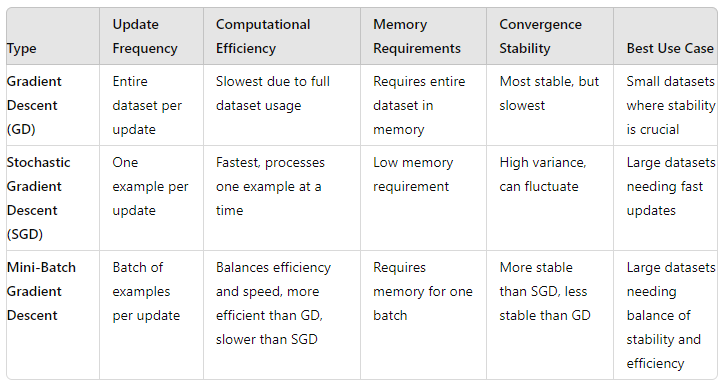

## VI. SGD in Action: A Walkthrough Example

A. Setting up a simple problem: Linear regression
B. Implementing SGD step by step
C. Visualizing the progress of SGD

Now, let's see an implementation

## VII. Practical Considerations and Variations

A. Choosing the learning rate

B. Mini-batch gradient descent: A middle ground

C. Dealing with noisy updates

D. When to use SGD vs. regular gradient descent

## VIII. Real-World Applications of SGD
A. Large-scale machine learning problems
B. Deep learning and neural networks
C. Online learning scenarios

## IX. Conclusion
A. Recap of key concepts
B. The power and limitations of SGD
C. Encouragement for further exploration